In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
dataset=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data",names=[
    "Sample code number","Clump Thickness","Uniformity of Cell Size","Uniformity of Cell Shape",
    "Marginal Adhesion","Single Epithelial Cell Size","Bare Nuclei","Bland Chromatin",
    "Normal Nucleoli","Mitoses","Class"
])

In [4]:
dataset.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [6]:
dataset.shape

(699, 11)

In [7]:
dataset=dataset.drop(['Sample code number'],axis=1)

In [8]:
dataset.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [11]:
dataset['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump Thickness              699 non-null    int64 
 1   Uniformity of Cell Size      699 non-null    int64 
 2   Uniformity of Cell Shape     699 non-null    int64 
 3   Marginal Adhesion            699 non-null    int64 
 4   Single Epithelial Cell Size  699 non-null    int64 
 5   Bare Nuclei                  699 non-null    object
 6   Bland Chromatin              699 non-null    int64 
 7   Normal Nucleoli              699 non-null    int64 
 8   Mitoses                      699 non-null    int64 
 9   Class                        699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


In [15]:
dataset=dataset.replace('?',np.NaN)

In [16]:
for col in dataset.columns:
    print("\t %s:%d"%(col,dataset[col].isna().sum()))

	 Clump Thickness:0
	 Uniformity of Cell Size:0
	 Uniformity of Cell Shape:0
	 Marginal Adhesion:0
	 Single Epithelial Cell Size:0
	 Bare Nuclei:16
	 Bland Chromatin:0
	 Normal Nucleoli:0
	 Mitoses:0
	 Class:0


In [18]:
dataset['Bare Nuclei']=dataset['Bare Nuclei'].fillna(dataset['Bare Nuclei'].median())
dataset['Bare Nuclei']=dataset['Bare Nuclei'].astype(int)

In [19]:
dataset.dtypes

Clump Thickness                int64
Uniformity of Cell Size        int64
Uniformity of Cell Shape       int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int32
Bland Chromatin                int64
Normal Nucleoli                int64
Mitoses                        int64
Class                          int64
dtype: object

In [20]:
mallignant=dataset[dataset['Class']==4]
benign=dataset[dataset['Class']==2]

<AxesSubplot:xlabel='Clump Thickness', ylabel='Uniformity of Cell Size'>

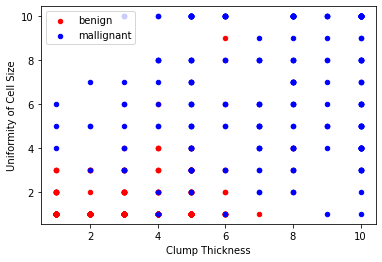

In [24]:
axes=benign.plot(kind='scatter',x="Clump Thickness",y="Uniformity of Cell Size",color="red",label="benign")
mallignant.plot(kind='scatter',x="Clump Thickness",y="Uniformity of Cell Size",color="blue",label="mallignant",ax=axes)

In [25]:
X=dataset.drop(['Class'],axis=1)
Y=dataset['Class']

In [74]:
from sklearn.model_selection import KFold
from sklearn import svm
model=svm.SVC(kernel='rbf')
kfoldvalidation=KFold(10)


In [79]:
from sklearn.metrics import f1_score
f1score=[]
for train_index,test_index in kfoldvalidation.split(X):
    Xtrain,Xtest=X.iloc[train_index,:],X.iloc[test_index,:]
    Ytrain,Ytest=Y[train_index],Y[test_index]
    model.fit(Xtrain,Ytrain)
    ypred=model.predict(Xtest)
    f1=f1_score(ypred,Ytest,pos_label=2)
    f1score.append(f1)
print("f1scores",f1score)
f1score10fold=np.mean(f1score)
print("f1score10fold",f1score10fold)

f1scores [0.8611111111111112, 0.9767441860465116, 0.9885057471264368, 0.9354838709677419, 0.9577464788732395, 0.9814814814814815, 0.98, 0.9914529914529915, 0.9894736842105264, 0.9909909909909909]
f1score10fold 0.9652990542261032


In [83]:
from sklearn.model_selection import cross_val_score
results=cross_val_score(model,X,Y,cv=kfoldvalidation)
print(results)
print("mean")
print(np.mean(results))

[0.85714286 0.97142857 0.98571429 0.94285714 0.95714286 0.97142857
 0.97142857 0.98571429 0.98571429 0.98550725]
mean
0.9614078674948242


In [85]:
from sklearn.model_selection import train_test_split
from sklearn import svm
ratios=[0.2,.3,0.4]
f1s=[]
for i in ratios:
    Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=i)
    model=svm.SVC(kernel='rbf')
    model.fit(Xtrain,Ytrain)
    ypred=model.predict(Xtest)
    f1=f1_score(ypred,Ytest,pos_label=2)
    f1s.append(f1)
print(f1s)


[0.9485714285714286, 0.9859154929577465, 0.9807162534435261]


In [87]:
table={"f1 10 fold":f1score10fold,
      "f1 80:20":f1s[0],
      "f1 70:30":f1s[1],
      "f1 60:40":f1s[2]}
print(table)

{'f1 10 fold': 0.9652990542261032, 'f1 80:20': 0.9485714285714286, 'f1 70:30': 0.9859154929577465, 'f1 60:40': 0.9807162534435261}
